In [1]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\benhu\\Desktop\\Research\\radwatch-analysis\\ROI.py'>

In [2]:
source_energies = np.array([605, 609, 662, 1460, 2614]);
spectrum = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1902Halibut.spe'
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 172800
wetweight = 468.2
spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\UCB1902Halibut.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

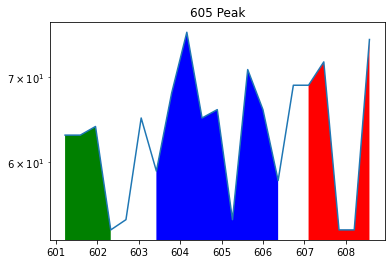

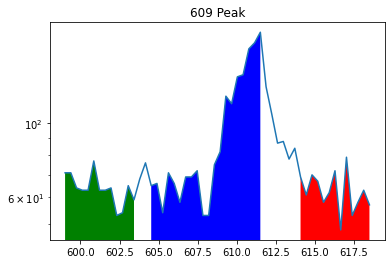

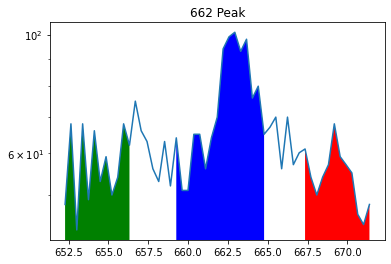

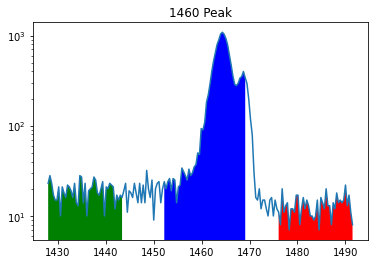

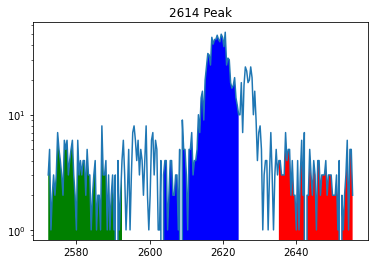

In [3]:
roi.set_sideband(605, 2, [[-2, -1], [-0.9, 0.9], [1, 2]])
roi.set_sideband(609, 5, [[-2, -1], [-0.9, 0.6], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.6, 0.7], [1, 2]])
roi.set_sideband(1460, 16, [[-2, -1], [-0.5, 0.6], [1, 2]])
roi.set_sideband(2614, 21, [[-2, -1], [-0.5, 0.525], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [4]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()

eff_func = am.Efficiency()
eff_func.set_parameters()

efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 253.68624598154503
bg peak counts 276.02130311789654
signal bg 298.50000000000006
signal peak 560.0
background spec sidebands 692.7201302886342
bg peak counts 1426.110066109132
signal bg 784.0
signal peak 1999.0
background spec sidebands 630.3819857438918
bg peak counts 688.0531034243218
signal bg 746.9999999999999
signal peak 1219.0
background spec sidebands 628.0484723117356
bg peak counts 2359.5154389715844
signal bg 690.0
signal peak 13989.0
background spec sidebands 181.68068864644158
bg peak counts 1278.7653608215594
signal bg 167.5
signal peak 1188.0
Loaded fit parameters 0-4: [-0.0530201  -0.23393142 -0.49270682 -1.0079565  -4.5553875 ]
Loaded input energies: []
Loaded energy uncertainties: [0.02016385 0.03079805 0.02757461 0.01707092 0.01090811 0.01032225]
[0.019812801529679906, 0.019742405309284897, 0.018854421202205197, 0.01051768041536737, 0.004697785950678424]
[0.0013840563823127802, 0.0027870952788165634, 0.0023977365874975126, 0.0669417420910888

In [5]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: 0.00014920263183414192 ± 2.2922775804747194e-05 Bq/g (wet weight)
Specific activity at 609 keV: 0.00030152292857167987 ± 4.22997016646072e-05 Bq/g (wet weight)
Specific activity at 662 keV: 0.00027161694242524984 ± 3.490152898216381e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.013593948817992876 ± 0.00015359794744347052 Bq/g (wet weight)
Specific activity at 2614 keV: -0.00020149927385974668 ± 0.00013534069838227894 Bq/g (wet weight)
